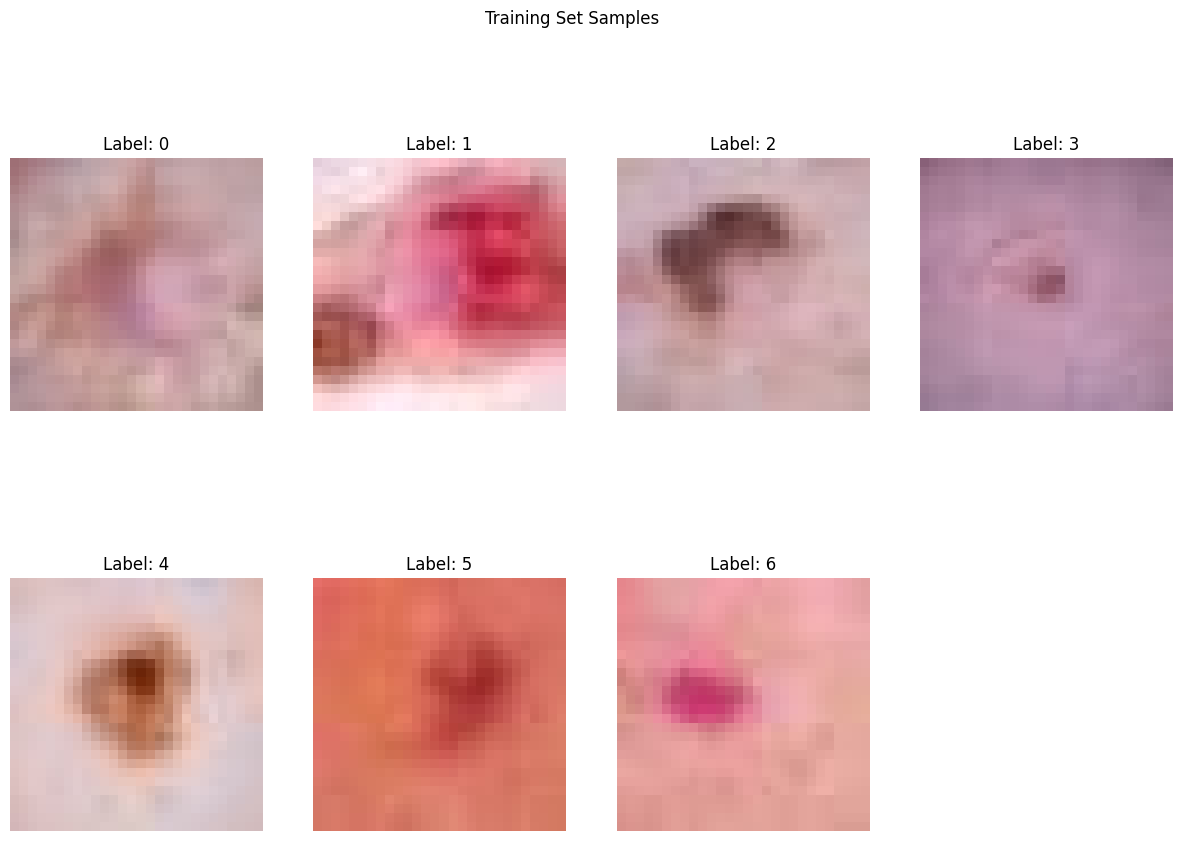

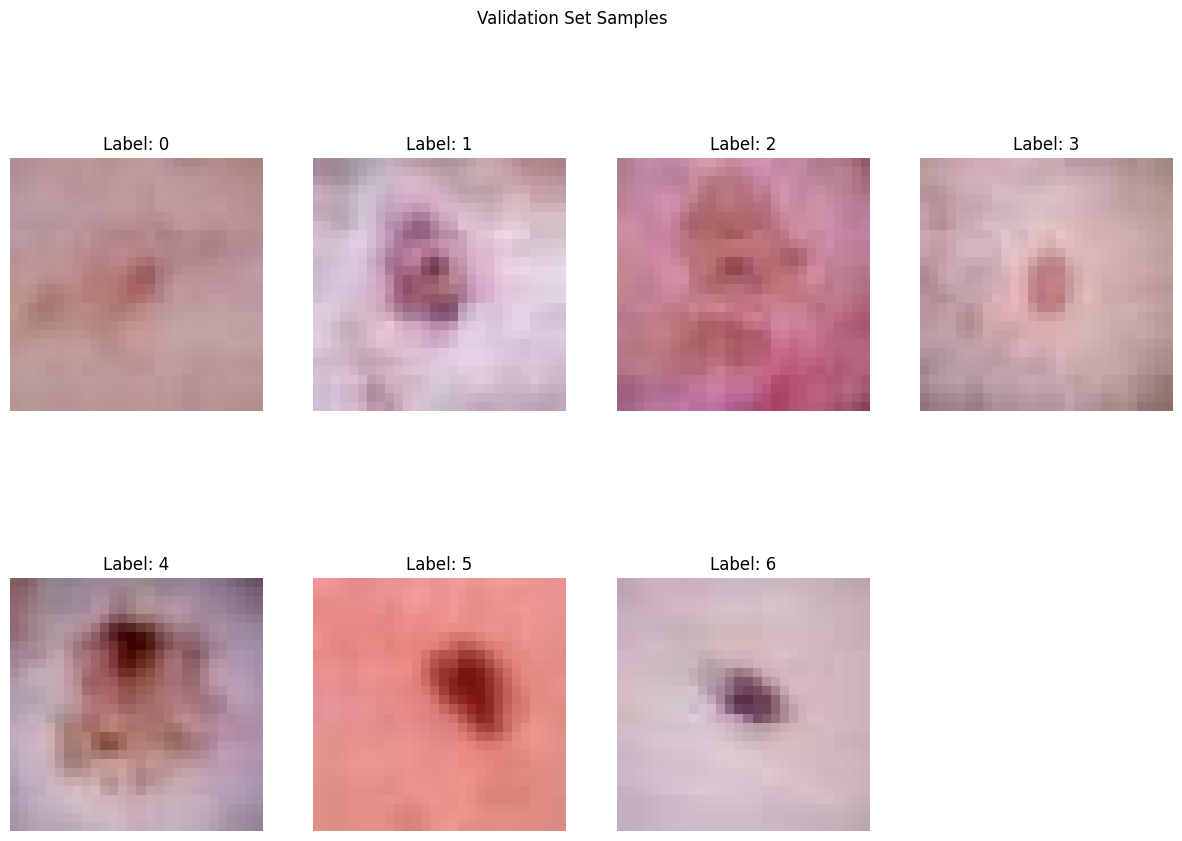

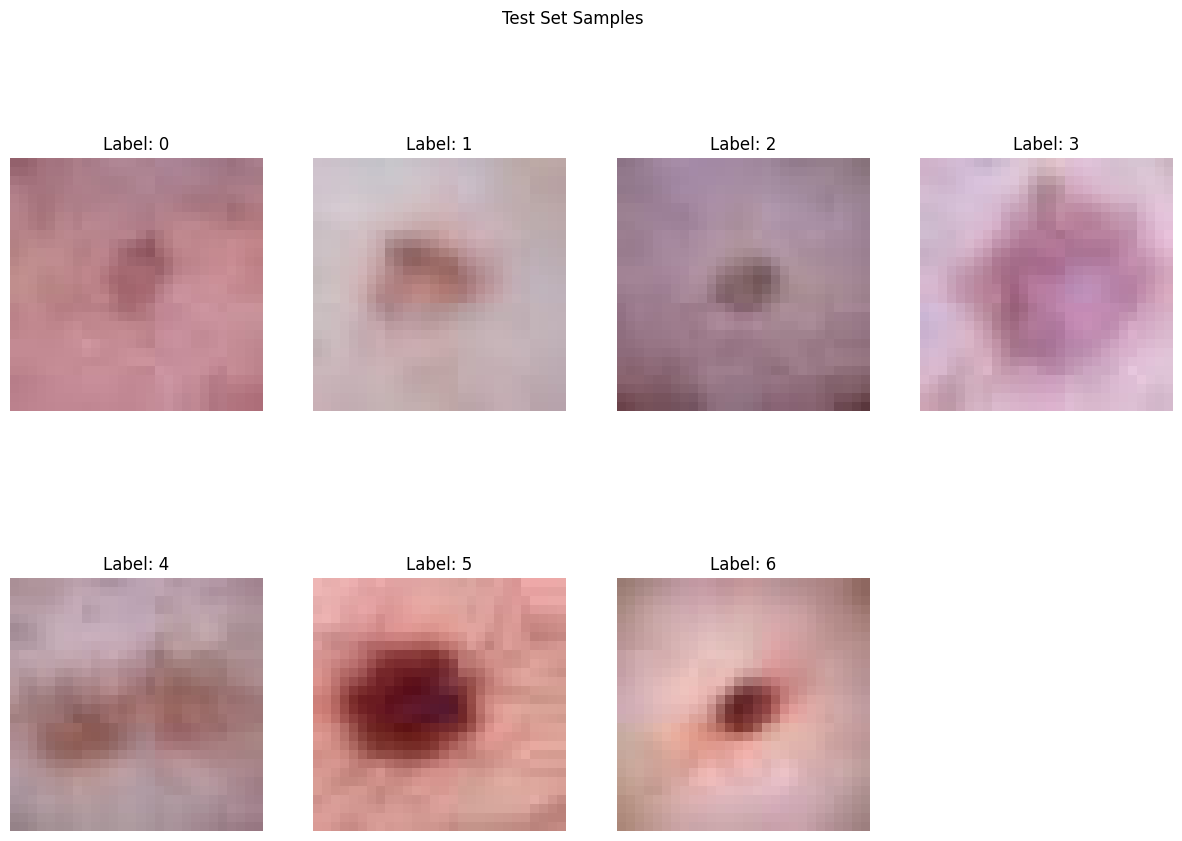

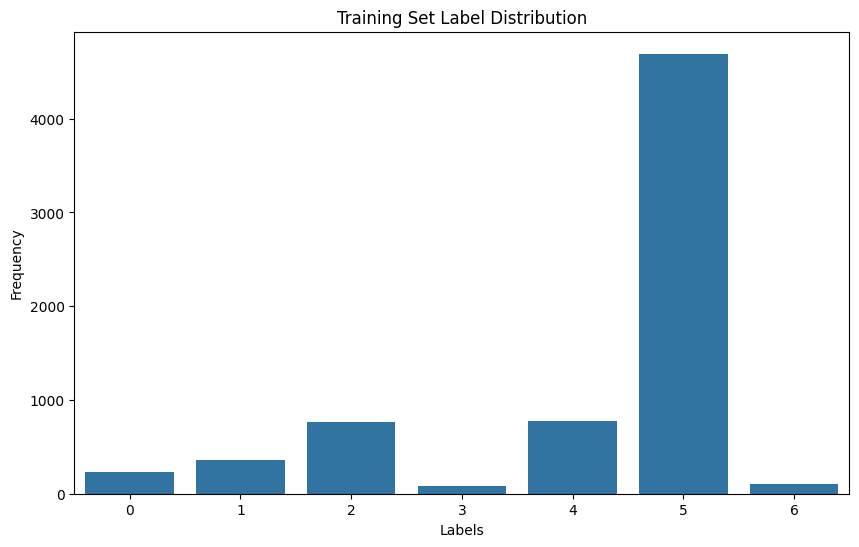

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = np.load('/content/sample_data/dermamnist.npz')
# Extracting data
train_images = data['train_images']
val_images = data['val_images']
test_images = data['test_images']
train_labels = data['train_labels']
val_labels = data['val_labels']
test_labels = data['test_labels']

# Function to visualize sample images for each label
def visualize_images_for_each_label(images, labels, title="Sample Images"):
    plt.figure(figsize=(15, 10))
    unique_labels = np.unique(labels)
    n_labels = len(unique_labels)

    for label in unique_labels:
        # Find the first instance of the current label
        idx = np.where(labels == label)[0][0]  # Adjust based on how labels are structured
        plt.subplot(2, n_labels // 2 + n_labels % 2, label + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f"Label: {label}")
        plt.axis('off')

    plt.suptitle(title)
    plt.show()

# Visualize sample images from each set
visualize_images_for_each_label(train_images, train_labels, title="Training Set Samples")
visualize_images_for_each_label(val_images, val_labels, title="Validation Set Samples")
visualize_images_for_each_label(test_images, test_labels, title="Test Set Samples")

# Distribution of labels across the dataset
def plot_label_distribution(labels, title="Label Distribution"):
    unique, counts = np.unique(labels, return_counts=True)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=unique, y=counts)
    plt.title(title)
    plt.xlabel('Labels')
    plt.ylabel('Frequency')
    plt.show()

plot_label_distribution(train_labels, title="Training Set Label Distribution")



Training Logistic Regression with solver='lbfgs'...
Training Accuracy: 85.37%
Test Accuracy: 66.73%
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.18      0.17      0.17        66
           1       0.38      0.40      0.39       103
           2       0.39      0.27      0.32       220
           3       0.09      0.09      0.09        23
           4       0.25      0.15      0.19       223
           5       0.79      0.88      0.83      1341
           6       0.34      0.48      0.40        29

    accuracy                           0.67      2005
   macro avg       0.35      0.35      0.34      2005
weighted avg       0.63      0.67      0.64      2005



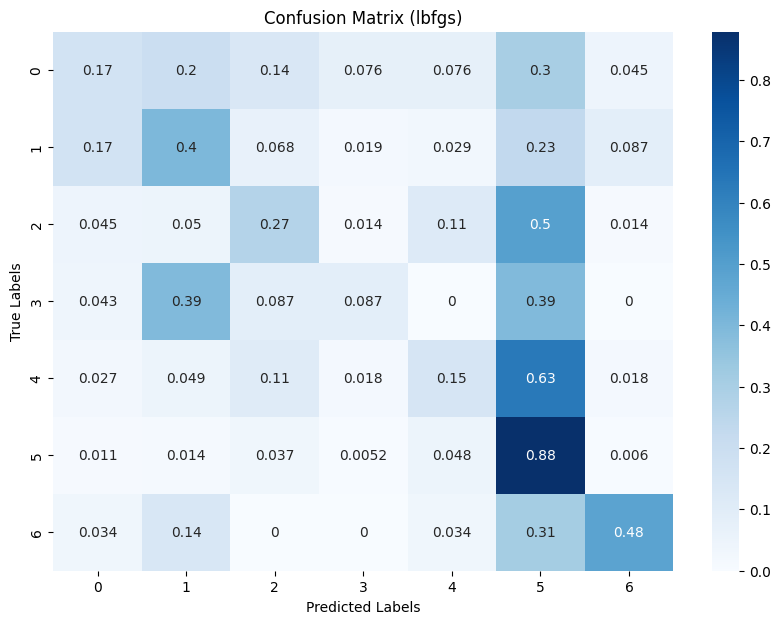


Training Logistic Regression with solver='saga'...
Training Accuracy: 64.05%
Test Accuracy: 63.14%
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.27      0.05      0.08        66
           1       0.26      0.58      0.36       103
           2       0.35      0.55      0.43       220
           3       0.00      0.00      0.00        23
           4       0.28      0.29      0.29       223
           5       0.86      0.76      0.80      1341
           6       0.50      0.14      0.22        29

    accuracy                           0.63      2005
   macro avg       0.36      0.34      0.31      2005
weighted avg       0.67      0.63      0.64      2005



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


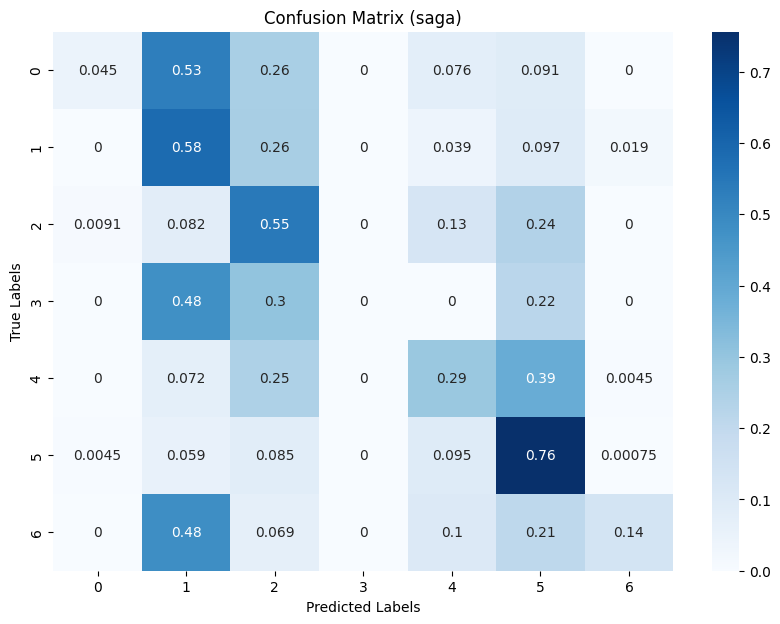

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = np.load('/content/sample_data/dermamnist.npz')

# Extracting the dataset
train_images = data['train_images']
train_labels = data['train_labels'].flatten()
test_images = data['test_images']
test_labels = data['test_labels'].flatten()

# Flatten the images
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Normalize the pixel values
scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images_flat)
test_images_scaled = scaler.transform(test_images_flat)

# Define a function to train and evaluate the model
def train_evaluate_logistic_regression(solver, max_iter, tol):
    print(f"\nTraining Logistic Regression with solver='{solver}'...")
    model = LogisticRegression(solver=solver, max_iter=max_iter, tol=tol, random_state=42)
    model.fit(train_images_scaled, train_labels)

    # Predict on the training and test set
    train_preds = model.predict(train_images_scaled)
    test_preds = model.predict(test_images_scaled)

    # Evaluate the model
    train_accuracy = accuracy_score(train_labels, train_preds)
    test_accuracy = accuracy_score(test_labels, test_preds)
    print(f"Training Accuracy: {train_accuracy*100:.2f}%")
    print(f"Test Accuracy: {test_accuracy*100:.2f}%")

    # Classification report
    print("Classification Report (Test Set):")
    print(classification_report(test_labels, test_preds))

    # Confusion Matrix
    cm = confusion_matrix(test_labels, test_preds,  normalize="true")
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=np.unique(train_labels), yticklabels=np.unique(train_labels))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix ({solver})')
    plt.show()

# Train and evaluate using both solvers
for solver in ['lbfgs', 'saga']:
    train_evaluate_logistic_regression(solver=solver, max_iter=5000, tol=0.1)


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = np.load('/content/sample_data/dermamnist.npz')

# Extracting data
train_images = data['train_images']
val_images = data['val_images']
test_images = data['test_images']
train_labels = data['train_labels']
val_labels = data['val_labels']
test_labels = data['test_labels']

# Flatten the image data
# Convert images from 3D (e.g., 28x28 pixels) to 2D (784,)
train_images_flattened = train_images.reshape(train_images.shape[0], -1)
val_images_flattened = val_images.reshape(val_images.shape[0], -1)
test_images_flattened = test_images.reshape(test_images.shape[0], -1)

# Combine training and validation sets for more extensive training data
X_train_full = np.concatenate((train_images_flattened, val_images_flattened), axis=0)
y_train_full = np.concatenate((train_labels, val_labels), axis=0)

# Initialize and train a KNN classifier
# You can change the number of neighbors based on your requirements
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_full, y_train_full.ravel())

# Make predictions on the test set and evaluate the model
y_pred = knn.predict(test_images_flattened)
print(f"Test Accuracy: {accuracy_score(test_labels, y_pred)*100:.2f}%")
print("\nClassification Report on Test Set:\n", classification_report(test_labels, y_pred))

Test Accuracy: 68.73%

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.37      0.38      0.37        66
           1       0.33      0.39      0.36       103
           2       0.38      0.42      0.40       220
           3       0.11      0.09      0.10        23
           4       0.33      0.10      0.15       223
           5       0.80      0.89      0.85      1341
           6       0.33      0.03      0.06        29

    accuracy                           0.69      2005
   macro avg       0.38      0.33      0.33      2005
weighted avg       0.65      0.69      0.66      2005



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

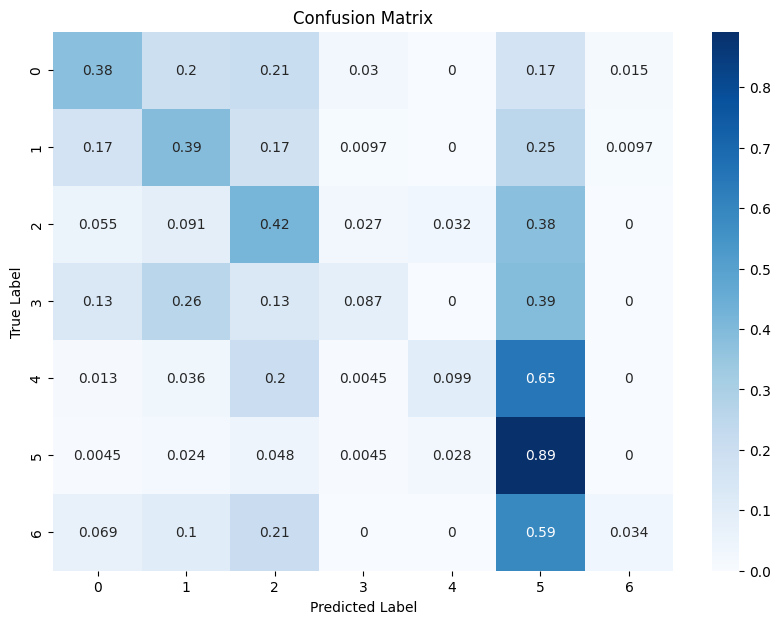

In [ ]:
cm = confusion_matrix(test_labels, y_pred, normalize="true")

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()